# PINN for Paramterised Geometry :

- in this case instead of having a fixed boundary condition we have a variable boundary condition at the right end or the upper bound of the domain. So we will take this as an input to the problem at hand to generate the solution. 

PINN inputs/ outputs: 

- inputs will have the points in the domain, the left boundary condition (fixed) and the right boundary condition parameter $l$ to represent the variable boundary condition 

- outputs will include the predicted value for a given $x$, we can also return the gradients if needed (not done here) 

- to define the loss function the discussion is similar to that of a fixed condition PINN, an expression for the loss is given as:

$$L = L_p + L_d = \frac{1}{N_x} \sum r_x^2 + \alpha\left( u^2(0) + u^2(l)\right)$$



### imports:

In [1]:
from PINN import * 

In [2]:
import numpy as np 

### create the loop for the task:

In [3]:
def main(l):
  network=Network.build()
  network.summary()

  pinn=PINN(network).build()

  #creating training input
  num_train_samples = 10000
  tx_eqn=np.linspace(0, l, num_train_samples) #t_eqn = 0 to 1
  tx_bnd=np.array([[l] for i in range(num_train_samples//2)] + [[0] for i in range(num_train_samples//2)])


  #creating training output
  u_eqn=np.zeros((num_train_samples,1)) 
  u_bnd = np.zeros((num_train_samples, 1))  

  x_train=[tx_eqn,tx_bnd]
  y_train=[u_eqn,u_bnd]
  lbfgs= L_BFGS_B(model=pinn,x_train=x_train,y_train=y_train)
  lbfgs.fit()


  x_flat = np.linspace(0, l, 1000)
  u = network.predict(x_flat, batch_size=1000)

  return x_flat, u 

In [4]:
x0, u0 = main(1)
x1, u1 = main(1.1)
x2, u2 = main(1.2)
x3, u3 = main(1.3)
x4, u4 = main(1.4)
x5, u5 = main(1.5)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________
Optimizer: L-BFGS-B (maxiter=5000)
5000/5000 [=============

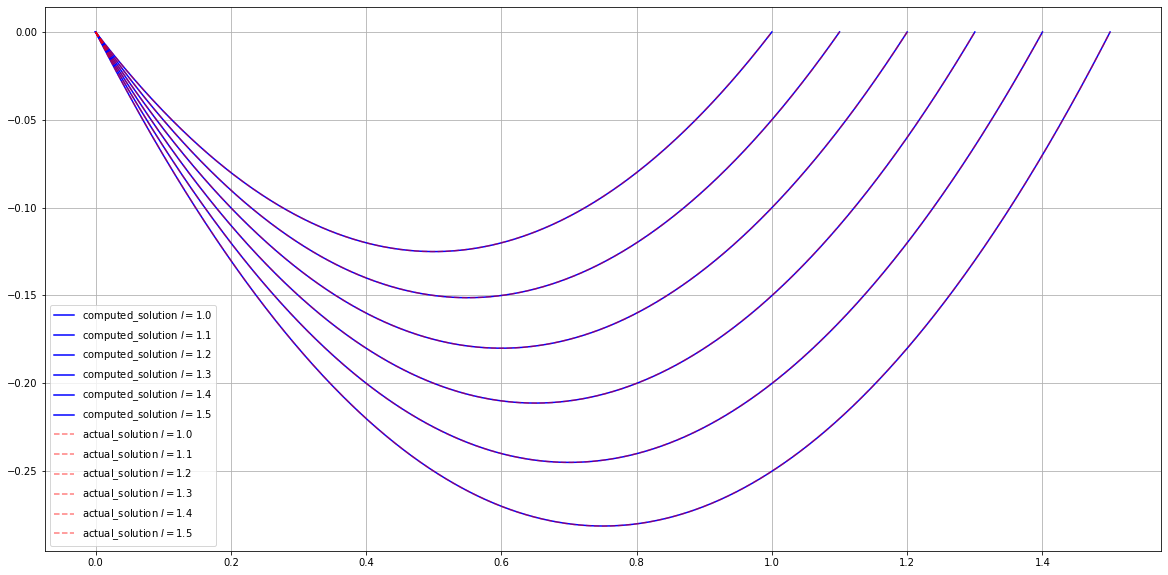

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 10))

plt.plot(x0, u0[:,0], 'b', label ='computed_solution $l = 1.0$')
plt.plot(x1, u1[:,0], 'b', label ='computed_solution $l = 1.1$')
plt.plot(x2, u2[:,0], 'b', label ='computed_solution $l = 1.2$')
plt.plot(x3, u3[:,0], 'b', label ='computed_solution $l = 1.3$')
plt.plot(x4, u4[:,0], 'b', label ='computed_solution $l = 1.4$')
plt.plot(x5, u5[:,0], 'b', label ='computed_solution $l = 1.5$')

plt.plot(x0, x0*(x0-1)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.0$')
plt.plot(x1, x1*(x1-1.1)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.1$')
plt.plot(x2, x2*(x2-1.2)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.2$')
plt.plot(x3, x3*(x3-1.3)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.3$')
plt.plot(x4, x4*(x4-1.4)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.4$')
plt.plot(x5, x5*(x5-1.5)/2, '--r', alpha = 0.5, label ='actual_solution $l = 1.5$')

plt.grid()
plt.legend()

### discussion:

such an architecture may be used to model situations where the domain/ boundary of the problem might be expanding or contracting. in such a scenario if we know the speed $v_d$ of the domain expansion then we can train the neural network with the boundary conditions: 

1. $u(x = 0) = 0$
2. $u(x = x_0 + v_d t) = 0$

where $t$ is the time difference between the two instances of measurement. we can thus capture the evolution of the solution with respect to the change in boundary condition's location. 

in an industrial setting the suppose if we have an elastic beam that can stretch or compress and also bend, we need to deflection or buckling behavior as a function of x, in such a case:



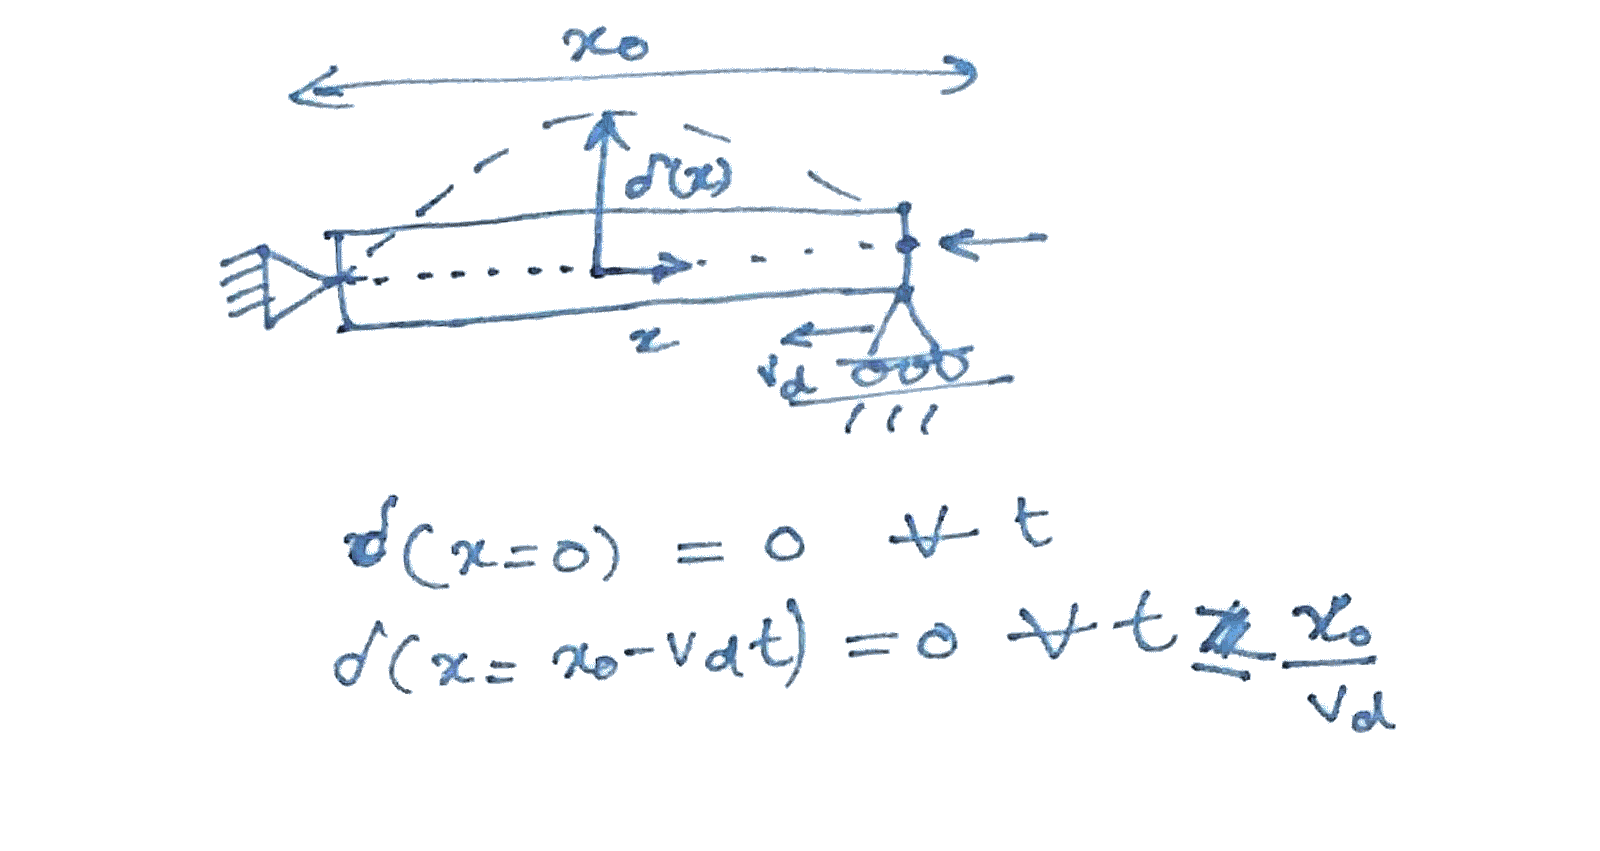